In [4]:
# Install RDKit.
# %%capture
!pip install rdkit-pypi

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel('alcohols.xlsx')
df.head()

,Name,Smiles
0,2-phenoxyethanol,OCCOC1=CC=CC=C1
1,2-bromoethanol,BrCCO
2,2-fluoroethanol,FCCO
3,methanol,CO
4,benzylalcohol,OCC1=CC=CC=C1


In [7]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')

In [8]:
df.head()

,Name,Smiles,mol
0,2-phenoxyethanol,OCCOC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x780d6f48bed0>
1,2-bromoethanol,BrCCO,<rdkit.Chem.rdchem.Mol object at 0x780d6f48bd80>
2,2-fluoroethanol,FCCO,<rdkit.Chem.rdchem.Mol object at 0x780d6f48be60>
3,methanol,CO,<rdkit.Chem.rdchem.Mol object at 0x780d6f48bf40>
4,benzylalcohol,OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x780d6f48bca0>


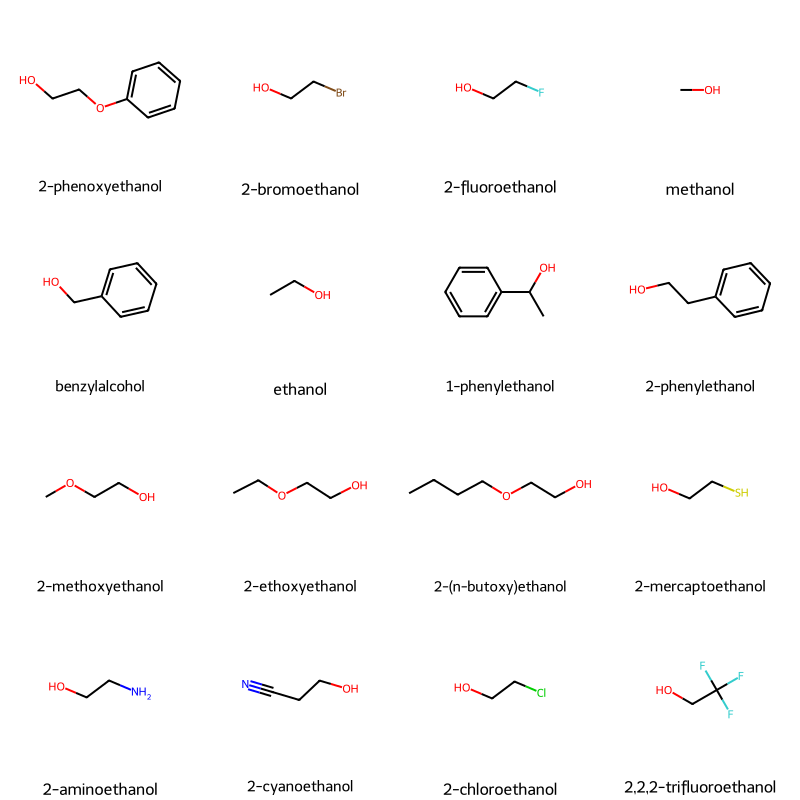

In [9]:
Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Name'][:16]])

## **MACCS-Keys**


> A set of 166 pre-defined structural keys.



In [10]:
maccs_bv = MACCSkeys.GenMACCSKeys(df['mol'][4])

In [11]:
maccs_bv

In [12]:
maccs_np = np.array(maccs_bv)

In [13]:
maccs_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [14]:
maccs = pd.DataFrame(maccs_np).T
maccs

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0


In [15]:
# count the number of bits
Counter(maccs_np)

Counter({0: 157, 1: 10})

In [16]:
# print the position of On bits
print(f'The bits are on at position {list(maccs_bv.GetOnBits())}')

The bits are on at position [82, 109, 139, 153, 155, 157, 162, 163, 164, 165]


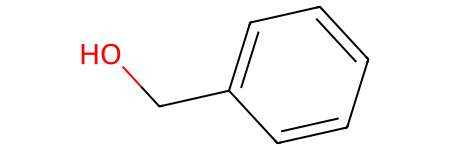

In [17]:
df['mol'][4]

## **Morgan Fingerprint (Circular Fingerprint)**

In [18]:
bi = {}
mf_bv = AllChem.GetMorganFingerprintAsBitVect(df['mol'][4], radius=2, nBits = 2048, bitInfo=bi)

In [19]:
mf_bv

In [20]:
# convert the bit vector into np array
mf_np = np.array(mf_bv)
# count the number of bits
Counter(mf_bv)

Counter({0: 2034, 1: 14})

In [21]:
# print the position of on bits
print(f'The bits are on at position {list(mf_bv.GetOnBits())}')

The bits are on at position [58, 80, 222, 389, 807, 837, 1066, 1073, 1088, 1199, 1380, 1750, 1754, 1873]


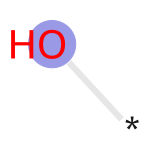

In [22]:
Draw.DrawMorganBit(mol = df['mol'][4], bitId=807, bitInfo=bi)

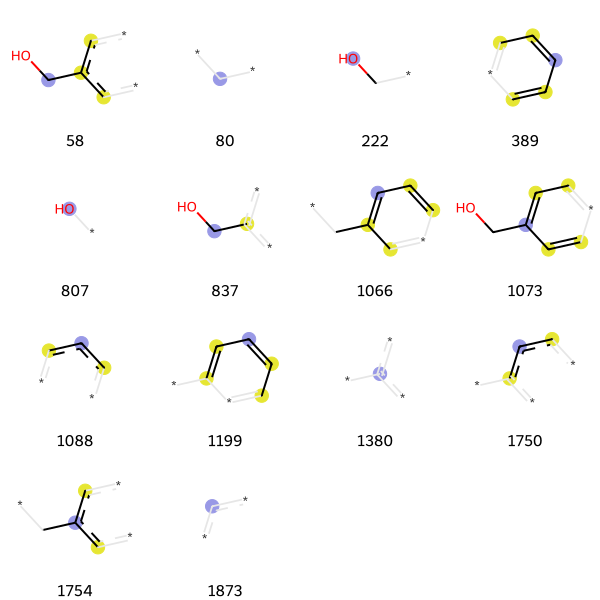

In [23]:
tpls = [(df['mol'][4],x,bi) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])